In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [183]:
#Loading the data set into memory
df = pd.read_csv("loan.csv")
#list the data in dataset
df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [68]:
#listing the shape of loan dataset
df.shape

(39717, 111)

In [65]:
#listing the structural information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [69]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [70]:
# Step 1: Apply the nunique method to each column
unique_counts = df.nunique()

# Step 2: Identify columns with only a single unique value
single_value_columns = unique_counts[unique_counts == 1].index

print("Columns with a single unique value:", single_value_columns)

Columns with a single unique value: Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [71]:
df.shape

(39717, 111)

In [72]:
#dropping the columns which have single value 
df.drop(columns=['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],axis = 1, inplace = True)

In [73]:
df.shape

(39717, 102)

In [43]:
df.shape

(39717, 102)

In [74]:
#listing all the columns which have only null values.
#these columns will have no effect on analysis
null_columns = df.isnull().all()
# Step 2: Identify columns where all values are null
all_null_columns = null_columns[null_columns].index

print("Columns with only null values:", all_null_columns)

Columns with only null values: Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_p

In [75]:
#dropping all the columns which only has only null values. 
df.drop( ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'], axis = 1, inplace = True)

In [76]:
df.shape

(39717, 48)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39717 non-null  int64  
 1   member_id                 39717 non-null  int64  
 2   loan_amnt                 39717 non-null  int64  
 3   funded_amnt               39717 non-null  int64  
 4   funded_amnt_inv           39717 non-null  float64
 5   term                      39717 non-null  object 
 6   int_rate                  39717 non-null  object 
 7   installment               39717 non-null  float64
 8   grade                     39717 non-null  object 
 9   sub_grade                 39717 non-null  object 
 10  emp_title                 37258 non-null  object 
 11  emp_length                38642 non-null  object 
 12  home_ownership            39717 non-null  object 
 13  annual_inc                39717 non-null  float64
 14  verifi

In [79]:
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12942
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [80]:
#Looking at data dictionary, we find that certain columns will not play any role in loan approval. They provide the information after approval of loan.
#following are 
# next_paymnt_d
# title
# emp_title
# out_princp
# url
# id
# delinq_2yrs
# revol_bal
# mths_since_last_delinq
# mths_since_last_record
# next_paymnt_d
# tot_hi_cred_lim
# mths_since_last_major_derog
# total_bal_ex_mort
# total_bc_limit
# total_il_high_credit_limit
# member_id
# zip_code
# tax_liens

In [92]:
#Following columns will have no effect on the approval decision as most of the values are null in these columns
# next_paymnt_d
# title
# emp_title
# out_princp
# url
# id
# delinq_2yrs
# revol_bal
# mths_since_last_delinq
# mths_since_last_record
# next_paymnt_d
# tot_hi_cred_lim
# mths_since_last_major_derog
# total_bal_ex_mort
# total_bc_limit
# total_il_high_credit_limit
# member_id
# zip_code
# tax_liens

#df.drop( [  'title' , 'emp_title', 'out_prncp', 'url', 'id', 'delinq_2yrs', 'revol_bal', 'mths_since_last_delinq', 
                 #'mths_since_last_record',     'member_id', 'zip_code' ], axis = 1, inplace = True)



In [101]:
#df.drop(['next_pymnt_d'], axis = 1, inplace = True)
#df.drop(['last_pymnt_d'], axis = 1, inplace = True)
#df.drop(['last_pymnt_amnt'], axis = 1, inplace = True)
#df.drop(['out_prncp'], axis = 1, inplace = True)
#df.drop(['url'], axis = 1, inplace = True)
#df.drop(['member_id'], axis = 1, inplace = True)
#df.drop(['tax_liens'], axis = 1, inplace = True)
#df.drop(['emp_title'], axis = 1, inplace = True)
#df.drop(['desc'], axis = 1, inplace = True)
df.drop(['addr_state'], axis = 1, inplace = True)




In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [97]:
df.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12942
purpose                        0
addr_state                     0
dti                            0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_util                    50
total_acc                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  desc                  

In [30]:
#As we can see following columns tot_hiced_lim, total_bal_ex_mort, total_bc_limit  and total_il_high_cedit_limit columns are having only null values.
#therefoe they will not play any role in analysis and decision making.
#Therefore we will drop these columns
df.drop(['tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit' , 'total_il_high_credit_limit'
        ], axis = 1, inplace = True)

In [104]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [111]:
df.emp_length.fillna('0',inplace=True)
df['emp_length']=df.emp_length.str.extract('(\d+)')
df['emp_length'] = df['emp_length'].astype(float)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10.0,RENT,...,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1.0,RENT,...,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10.0,RENT,...,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10.0,RENT,...,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1.0,RENT,...,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,0.0


In [112]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               39717 non-null  float64
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [119]:
df[ 'revol_util']

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object

In [124]:

df['int_rate']=df['int_rate'].str.rstrip('%')
df['int_rate'] = df['int_rate'].astype(float)
df['revol_util']=df['revol_util'].str.rstrip('%')
df['revol_util'] = df['revol_util'].astype(float)
df['term']=df.term.str.extract('(\d+)')
df['term'] = df['term'].astype(int)


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  int32  
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               39717 non-null  float64
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [142]:
df['loan_status'].value_counts()
(df.loan_status.value_counts()*100)/len(df)

loan_status
Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: count, dtype: float64

<Axes: xlabel='loan_status', ylabel='Count'>

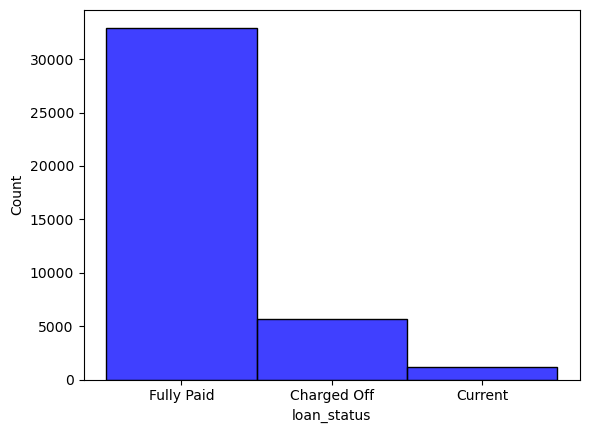

In [151]:
sns.histplot(df['loan_status'], kde=False, bins=10, color='blue')

#We can see that 14.17% loans are charged off
#2.87 percent loan are still running therefore those loan will not be participating in analysis

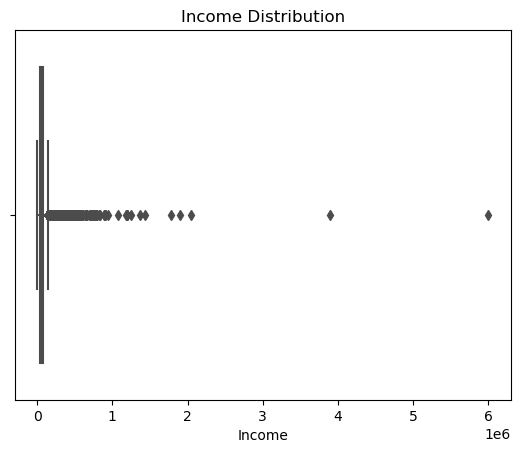

In [156]:
#Listing the outlier in the annual income column
# to understand the outlier on annual income column we will plot boxplot on annual income column

sns.boxplot(x=df['annual_inc'], color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.show()


In [163]:
#calculating the 1 quartile and 3 quartile and finding the interquartile distance
q1 = df.annual_inc.quantile(0.25)
q3=  df.annual_inc.quantile(.5)
iqr=q3-q1
print("Q1---- ",q1)
print("Q2---- ",q3)
print("IQR---- ",iqr)

Q1----  40404.0
Q2----  59000.0
IQR----  18596.0


In [173]:
#We will consider that outlier values in the annual income column are the records 
# which are having  values less than Q1-1.5*IQR or greater than Q3+1.5*IQR
lowerbound_inc=q1-1.5*iqr
upperbound_inc=q3+1.5*iqr
df[(df['annual_inc']<lowerbound_inc) | (df['annual_inc']>upperbound_inc)]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,...,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.0000,May-16,0.0
14,10000,10000,10000.0,36,10.65,325.74,B,B2,3.0,RENT,...,0.0,7471.990000,7471.99,5433.47,1393.42,0.0,645.1,6.3145,Mar-14,0.0
17,3600,3600,3600.0,36,6.03,109.57,A,A1,10.0,MORTGAGE,...,0.0,3785.271965,3785.27,3600.00,185.27,0.0,0.0,0.0000,May-14,0.0
21,21000,21000,21000.0,36,12.42,701.73,B,B4,10.0,RENT,...,0.0,14025.400000,14025.40,10694.96,3330.44,0.0,0.0,0.0000,May-16,0.0
25,15000,15000,15000.0,36,9.91,483.38,B,B1,2.0,MORTGAGE,...,0.0,15823.999050,15824.00,15000.00,824.00,0.0,0.0,0.0000,Sep-12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39706,5000,5000,150.0,36,8.07,156.84,A,A4,1.0,MORTGAGE,...,0.0,5645.957239,169.38,5000.00,645.96,0.0,0.0,0.0000,Jun-07,NaN
39707,5000,5000,525.0,36,9.33,159.77,B,B3,2.0,MORTGAGE,...,0.0,5751.530533,603.91,5000.00,751.53,0.0,0.0,0.0000,Jun-07,NaN
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4.0,MORTGAGE,...,0.0,2822.969293,1213.88,2500.00,322.97,0.0,0.0,0.0000,Jun-10,NaN
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,1.0,MORTGAGE,...,0.0,5272.161128,1397.12,5000.00,272.16,0.0,0.0,0.0000,Jun-07,NaN


In [175]:
df_no_outliers = df[(df['annual_inc'] >= lowerbound_inc) & (df['annual_inc'] <= upperbound_inc)]


In [176]:
df_no_outliers

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,...,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,May-16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1.0,RENT,...,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Sep-13,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,...,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Apr-16,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1.0,RENT,...,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3.0,RENT,...,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39709,5000,5000,675.0,36,11.22,164.23,C,C4,1.0,OWN,...,0.00,5912.052998,798.13,5000.00,912.05,0.00,0.00,0.00,Jun-07,NaN
39710,5000,5000,250.0,36,7.43,155.38,A,A2,1.0,OWN,...,0.00,5593.626092,279.68,5000.00,593.63,0.00,0.00,0.00,Jun-07,NaN
39711,5000,5000,700.0,36,8.70,158.30,B,B1,5.0,MORTGAGE,...,0.00,5698.603286,797.80,5000.00,698.60,0.00,0.00,0.00,Nov-14,NaN
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3.0,RENT,...,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,NaN


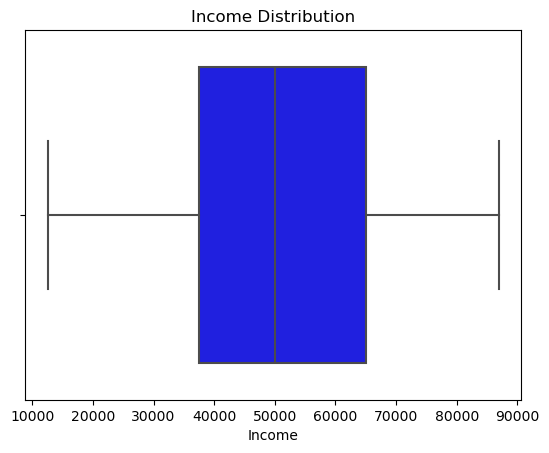

In [180]:
sns.boxplot(x=df_no_outliers['annual_inc'], color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.show()
#now we can see that outliers are removed from the annual income column

<Axes: xlabel='term'>

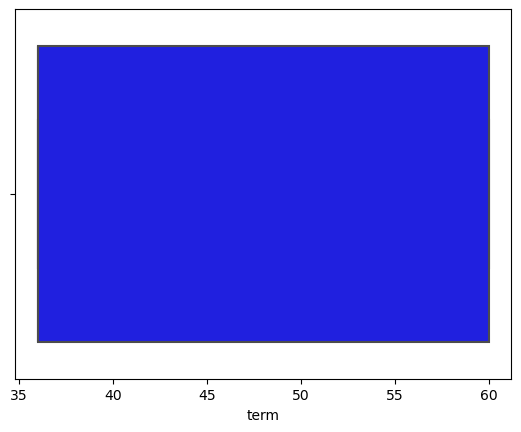

In [181]:
#Listing the outliers on term column
#Plotting the boxplot on term columns
# we can see there are no outliers
sns.boxplot(x=df_no_outliers['term'], color='blue')



<Axes: xlabel='home_ownership', ylabel='count'>

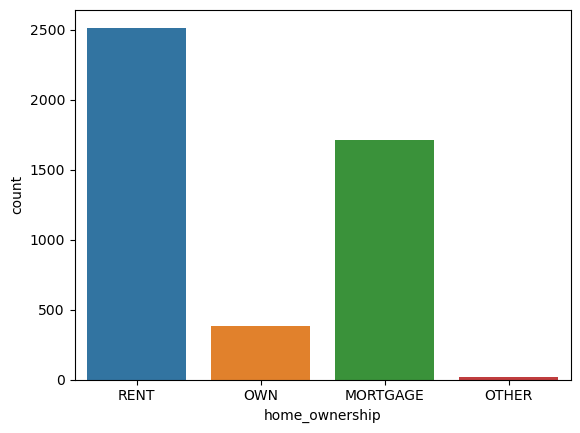

In [192]:
#displaying the countplot on home_ownership column of the dataset
sns.countplot(x='home_ownership', data=df_no_outliers[df_no_outliers['loan_status']=='Charged Off'])
#We can clearly see the most of the customers are living rented place.

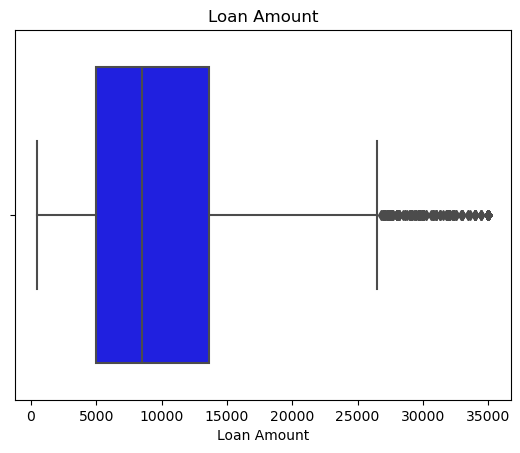

In [193]:
sns.boxplot(x=df_no_outliers['loan_amnt'], color='blue')
plt.title('Loan Amount')
plt.xlabel('Loan Amount')
plt.show()


In [197]:
#calculating the 1 quartile and 3 quartile and finding the interquartile distance
q1 = df_no_outliers.loan_amnt.quantile(0.25)
q3=  df_no_outliers.loan_amnt.quantile(.5)
iqr=q3-q1
print("Q1---- ",q1)
print("Q2---- ",q3)
print("IQR---- ",iqr)

Q1----  5000.0
Q2----  8500.0
IQR----  3500.0


In [198]:
#We will consider that outlier values in the annual income column are the records 
# which are having  values less than Q1-1.5*IQR or greater than Q3+1.5*IQR
lb_loan_amt=q1-1.5*iqr
ub_loan_amt=q3+1.5*iqr
df_no_outliers[(df_no_outliers['loan_amnt']<lb_loan_amt) | (df_no_outliers['loan_amnt']>ub_loan_amt)]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
20,20250,20250,19142.161080,60,15.27,484.63,C,C4,3.0,RENT,...,0.0,27679.05000,25433.60,20250.00,7429.05,0.0,0.00,0.0000,Mar-16,0.0
26,15000,15000,8725.000000,36,14.27,514.64,C,C2,9.0,RENT,...,0.0,0.00000,0.00,0.00,0.00,0.0,0.00,0.0000,May-16,0.0
31,31825,31825,31825.000000,36,7.90,995.82,A,A4,5.0,MORTGAGE,...,0.0,34886.91378,34886.91,31825.00,3061.91,0.0,0.00,0.0000,Feb-16,0.0
37,15000,15000,15000.000000,36,7.90,469.36,A,A4,1.0,RENT,...,0.0,16663.34403,16663.34,15000.00,1663.34,0.0,0.00,0.0000,May-16,0.0
45,14000,14000,14000.000000,36,9.91,451.15,B,B1,6.0,RENT,...,0.0,16241.38000,16241.38,14000.00,2241.38,0.0,0.00,0.0000,Apr-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39584,25000,25000,3724.990259,36,12.80,839.95,D,D4,2.0,MORTGAGE,...,0.0,9239.37000,1371.43,6646.07,2583.15,0.0,10.15,3.9100,May-16,NaN
39593,20000,4800,1949.999594,36,13.12,162.01,D,D5,8.0,MORTGAGE,...,0.0,1605.30000,651.62,1028.79,427.59,0.0,148.92,5.7222,May-16,NaN
39639,17000,17000,300.000000,36,9.33,543.20,B,B3,10.0,RENT,...,0.0,19555.18587,345.09,17000.00,2555.19,0.0,0.00,0.0000,Nov-15,NaN
39666,15450,15450,600.000000,36,11.22,507.46,C,C4,2.0,MORTGAGE,...,0.0,11652.75000,451.73,8688.59,2659.96,0.0,304.20,3.0900,Mar-10,1.0


In [203]:
df_no_outliers=df_no_outliers = df_no_outliers[(df_no_outliers['loan_amnt'] >= lb_loan_amt) & (df_no_outliers['loan_amnt'] <= ub_loan_amt)]


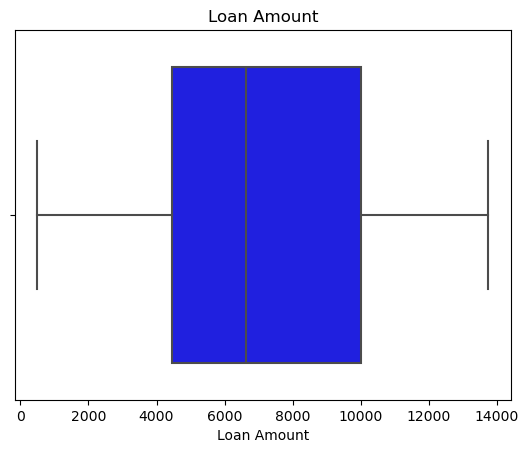

In [204]:
sns.boxplot(x=df_no_outliers['loan_amnt'], color='blue')
plt.title('Loan Amount')
plt.xlabel('Loan Amount')
plt.show()
#now we can see all the outliers are removed


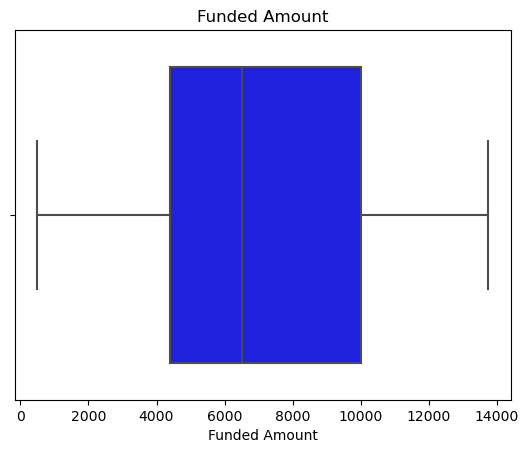

In [206]:
sns.boxplot(x=df_no_outliers['funded_amnt'], color='blue')
plt.title('Funded Amount')
plt.xlabel('Funded Amount')
plt.show()
# we can clearly see this column has no outliers.

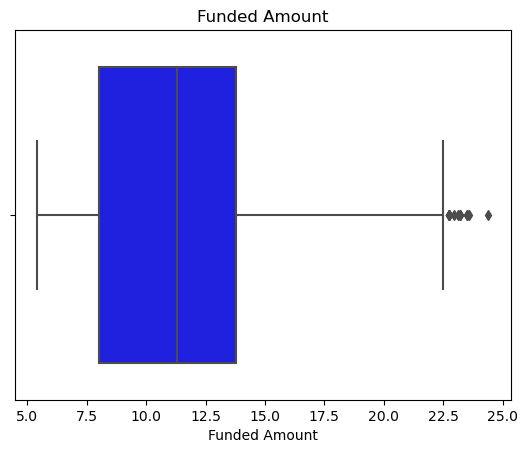

In [207]:
sns.boxplot(x=df_no_outliers['int_rate'], color='blue')
plt.title('Funded Amount')
plt.xlabel('Funded Amount')
plt.show()
# there are clearly outliers in interest rate column


In [ ]:
sns.stripplot( y='purpose', x='int_rate', data=df_no_outliers, jitter=True, palette='viridis')

In [ ]:
sns.boxplot(y='int_rate', x='purpose', data=df, palette='viridis')
